In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


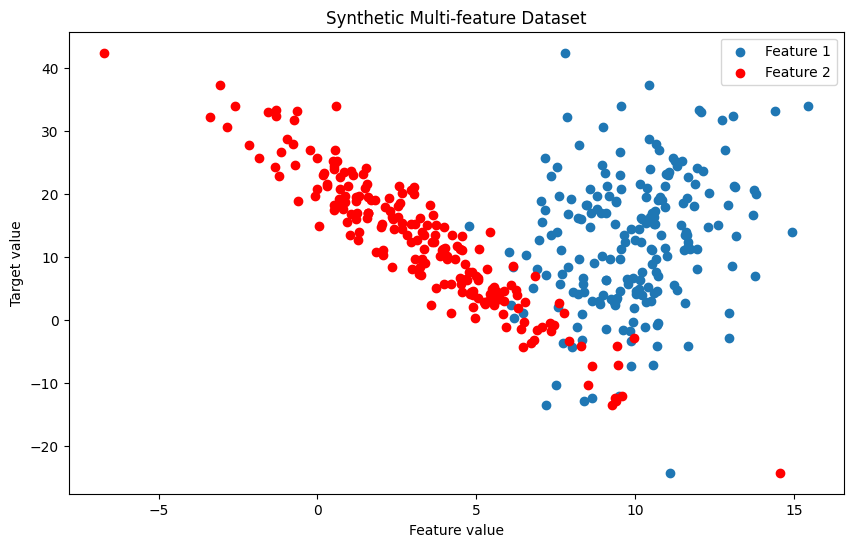

In [14]:
np.random.seed(42)

num_samples = 200
feature_1 = 2 * np.random.randn(num_samples) + 10   # Feature 1
feature_2 = 3 * np.random.randn(num_samples) + 3   # Feature 2
X = np.column_stack((feature_1, feature_2))

actual_weights = np.array([2, -3.5])
actual_bias = 4
noise = np.random.randn(num_samples)
y = np.dot(X, actual_weights) + actual_bias + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Plotting the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, label='Feature 1')
plt.scatter(X[:, 1], y, color='r', label='Feature 2')
plt.title('Synthetic Multi-feature Dataset')
plt.xlabel('Feature value')
plt.ylabel('Target value')
plt.legend()
plt.show()

In [15]:
X_train_normalized = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
y_train_normalized = (y_train - np.mean(y_train, axis=0)) / np.std(y_train, axis=0)

In [16]:
def compute_gradient(X, y, w, b):
    # Initialize variables needed
    # M is the number of samples, N is the number of features
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0
    y = y.reshape(-1, 1)
    
    # Current model's predictions
    y_pred = np.dot(X, w) + b
    # Calculate the difference between the actual and predicted values
    error = y_pred - y
    
    
    # Loop through all the features and calculate the gradient
    for i in range(n):  
        # Multiple error by the feature values (error * X[:, i])
        # The feature values are coming from the training set X in this case
        # This is what causes the weights to diverge from each other and converge to the optimal values
        dj_dw[i] = np.sum(error * X[:, i].reshape(-1, 1)) 
    # Sum of all the errors  
    dj_db = np.sum(error)
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

def gradient_descent(X, y, w, b, number_of_iterations=1000, learning_rate=0.01):
    for i in range(number_of_iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        # Update the weights and bias
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db
    return w, b

In [17]:
# Init weights and bias and run the gradient descent
w = np.zeros((X.shape[1], 1))
b = 0.

w_final, b_final = gradient_descent(X_train_normalized, y_train_normalized, w, b)

# Denormalize the weights and bias
w_final = w_final * np.std(y_train, axis=0) / np.std(X_train, axis=0).reshape(-1, 1)
b_final = np.mean(y_train, axis=0) - np.dot(np.mean(X_train, axis=0), w_final)

print(w_final, b_final)

[[ 1.91835398]
 [-3.49075528]] [4.65128399]


In [18]:
# Function to predict y values using the model parameters
def predict(X, w, b):
    return np.dot(X, w) + b

y_pred = predict(X, w_final, b_final)
y_pred_test = predict(X_test, w_final, b_final)

from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE
mse_sklearn = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error (MSE): {mse_sklearn}")

# Calculate R^2
r2_sklearn = r2_score(y_test, y_pred_test)
print(f"Coefficient of Determination (R^2): {r2_sklearn}")


Mean Squared Error (MSE): 0.9807379149685798
Coefficient of Determination (R^2): 0.9923698721879622


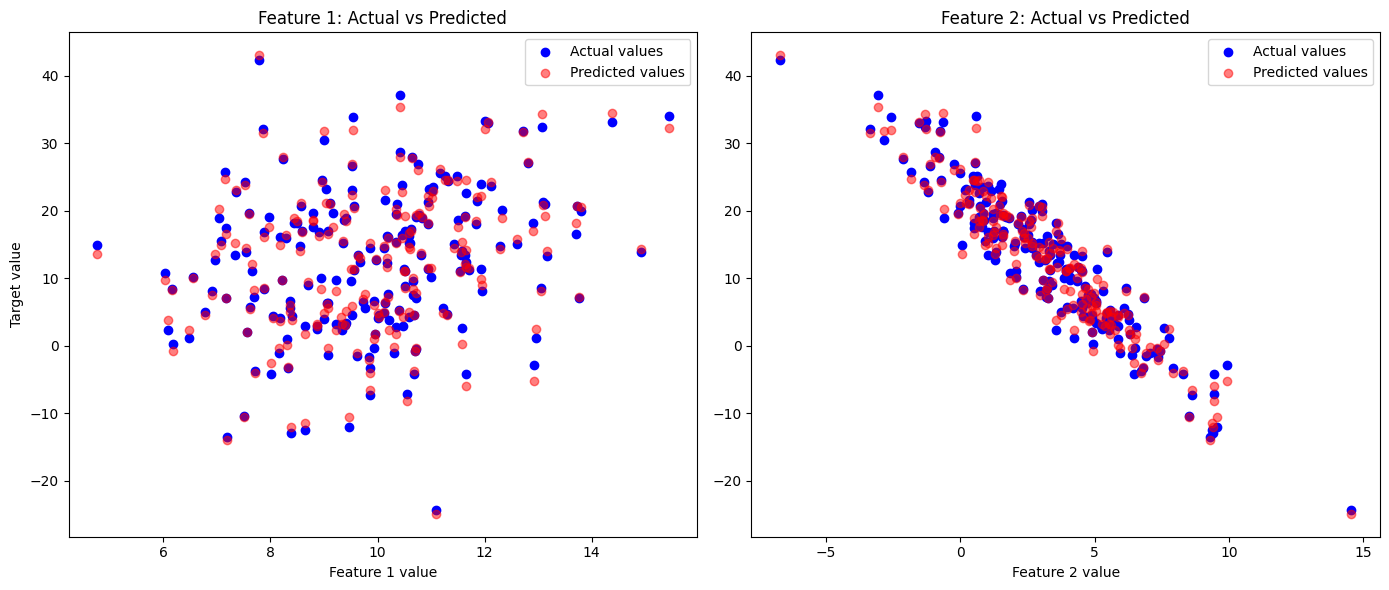

In [19]:
# MY MODEL
# Plot for Feature 1
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(X[:, 0], y, color='blue', label='Actual values')
plt.scatter(X[:, 0], y_pred, color='red', alpha=0.5, label='Predicted values')
plt.title('Feature 1: Actual vs Predicted')
plt.xlabel('Feature 1 value')
plt.ylabel('Target value')
plt.legend()

# Plot for Feature 2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(X[:, 1], y, color='blue', label='Actual values')
plt.scatter(X[:, 1], y_pred, color='red', alpha=0.5, label='Predicted values')
plt.title('Feature 2: Actual vs Predicted')
plt.xlabel('Feature 2 value')
plt.legend()

plt.tight_layout()
plt.show()


Sklearn Model weights: [ 1.91895839 -3.49117188]
Sklearn Model bias: 4.64663295097869


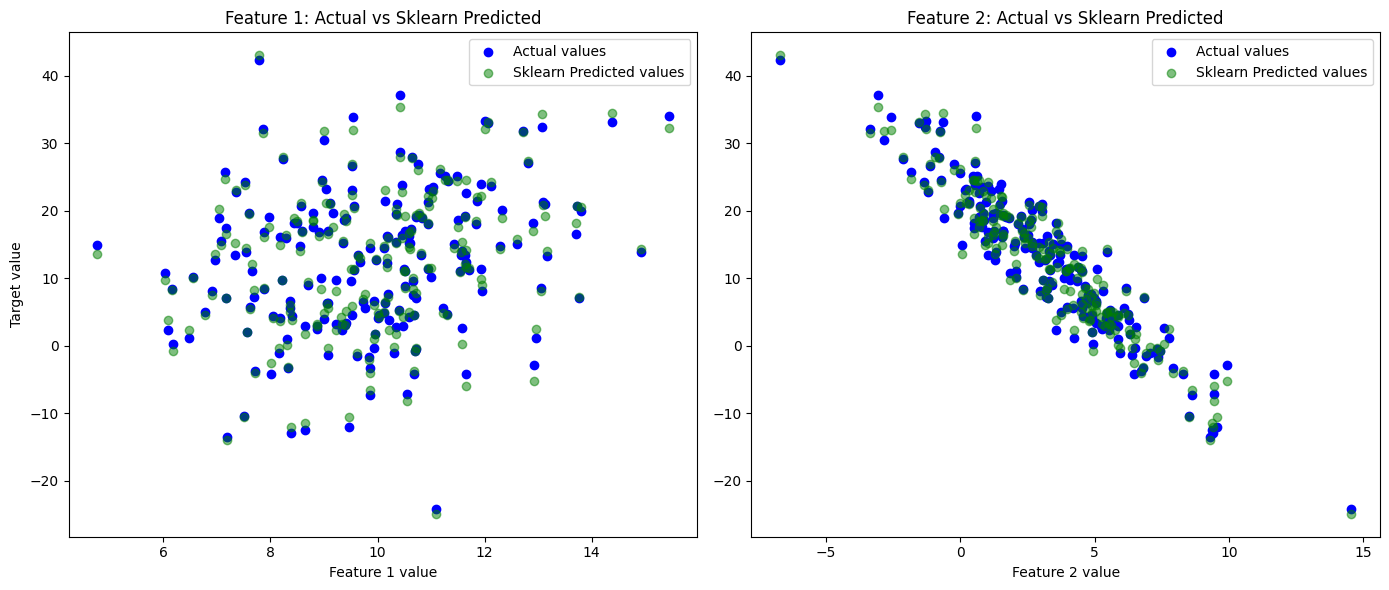

In [20]:
# SKLEARN MODEL

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Initialize and train the LinearRegression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict target values on the entire dataset for visualization
y_pred_sklearn = lr_model.predict(X)

print(f"Sklearn Model weights: {lr_model.coef_}")
print(f"Sklearn Model bias: {lr_model.intercept_}")

# Plot for Feature 1
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(X[:, 0], y, color='blue', label='Actual values')
plt.scatter(X[:, 0], y_pred_sklearn, color='green', alpha=0.5, label='Sklearn Predicted values')
plt.title('Feature 1: Actual vs Sklearn Predicted')
plt.xlabel('Feature 1 value')
plt.ylabel('Target value')
plt.legend()

# Plot for Feature 2
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(X[:, 1], y, color='blue', label='Actual values')
plt.scatter(X[:, 1], y_pred_sklearn, color='green', alpha=0.5, label='Sklearn Predicted values')
plt.title('Feature 2: Actual vs Sklearn Predicted')
plt.xlabel('Feature 2 value')
plt.legend()

plt.tight_layout()
plt.show()


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
print(f"Mean Squared Error (MSE) with sklearn: {mse_sklearn}")

# Calculate R^2
r2_sklearn = r2_score(y, y_pred_sklearn)
print(f"Coefficient of Determination (R^2) with sklearn: {r2_sklearn}")


Mean Squared Error (MSE) with sklearn: 0.9692263608445537
Coefficient of Determination (R^2) with sklearn: 0.9914995715406123
